In [192]:
# Imported Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time
%matplotlib inline

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, learning_curve, ShuffleSplit, RandomizedSearchCV
import collections

# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss, OneSidedSelection 
from imblearn.metrics import classification_report_imbalanced
from imblearn.under_sampling import CondensedNearestNeighbour
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

%config InlineBackend.figure_format = 'retina'

%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Import Data

In [221]:
df = pd.read_csv('bdss_datathon_train.csv')
testing = pd.read_csv('bdss_datathon_test_nolabel.csv')
xtest = testing.drop('Avg size household 1 - 6', axis=1)

In [222]:
df.describe()

,Customer Subtype,Number of houses 1 - 10,Avg size household 1 - 6,Avg age,Customer main type,Roman catholic,Protestant,Other religion,No religion,Married,...,Number of private accident insurance policies,Number of family accidents insurance policies,Number of disability insurance policies,Number of fire policies,Number of surfboard policies,Number of boat policies,Number of bicycle policies,Number of property insurance policies,Number of social security insurance policies,Purchased_Insurance
count,14777.000000,14777.000000,14777.000000,14777.000000,14777.000000,14777.000000,14777.000000,14777.000000,14777.000000,14777.000000,...,14777.000000,14777.000000,14777.000000,14777.000000,14777.000000,14777.000000,14777.000000,14777.000000,14777.000000,14777.000000
mean,22.635988,1.080666,2.670704,2.886445,5.391216,0.635515,4.565270,0.952967,3.033701,6.293294,...,0.002436,0.004466,0.002301,0.573459,0.000541,0.005481,0.022603,0.004263,0.009271,0.499425
std,13.462558,0.334758,0.732199,0.741923,2.989688,0.902490,1.590938,0.945536,1.535874,1.729448,...,0.049300,0.066684,0.053265,0.530889,0.023262,0.077416,0.174600,0.066188,0.096546,0.500017
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,1.000000,2.000000,2.000000,2.000000,0.000000,4.000000,0.000000,2.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,1.000000,3.000000,3.000000,6.000000,0.000000,5.000000,1.000000,3.000000,7.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,34.000000,1.000000,3.000000,3.000000,8.000000,1.000000,5.000000,2.000000,4.000000,7.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,41.000000,10.000000,6.000000,6.000000,10.000000,9.000000,9.000000,5.000000,9.000000,9.000000,...,1.000000,1.000000,2.000000,7.000000,1.000000,2.000000,4.000000,2.000000,2.000000,1.000000


In [223]:
df.head()

,Customer Subtype,Number of houses 1 - 10,Avg size household 1 - 6,Avg age,Customer main type,Roman catholic,Protestant,Other religion,No religion,Married,...,Number of private accident insurance policies,Number of family accidents insurance policies,Number of disability insurance policies,Number of fire policies,Number of surfboard policies,Number of boat policies,Number of bicycle policies,Number of property insurance policies,Number of social security insurance policies,Purchased_Insurance
0,30,1,3,3,7,0,4,0,5,8,...,0,0,0,1,0,0,0,0,0,1
1,8,1,4,3,2,1,4,1,2,7,...,0,0,0,1,0,0,0,0,0,1
2,34,1,2,3,8,1,4,1,3,5,...,0,0,0,1,0,0,0,0,0,1
3,33,1,3,3,8,0,4,0,4,8,...,0,0,0,1,0,0,0,0,0,1
4,8,1,3,2,2,2,4,1,4,6,...,0,1,0,1,0,0,0,0,1,0


In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14777 entries, 0 to 14776
Data columns (total 86 columns):
 #   Column                                            Non-Null Count  Dtype
---  ------                                            --------------  -----
 0   Customer Subtype                                  14777 non-null  int64
 1   Number of houses 1 - 10                           14777 non-null  int64
 2   Avg size household 1 - 6                          14777 non-null  int64
 3   Avg age                                           14777 non-null  int64
 4   Customer main type                                14777 non-null  int64
 5   Roman catholic                                    14777 non-null  int64
 6   Protestant                                        14777 non-null  int64
 7   Other religion                                    14777 non-null  int64
 8   No religion                                       14777 non-null  int64
 9   Married                                

Text(0.5, 1.0, 'Class Distributions \n (0 || 1)')

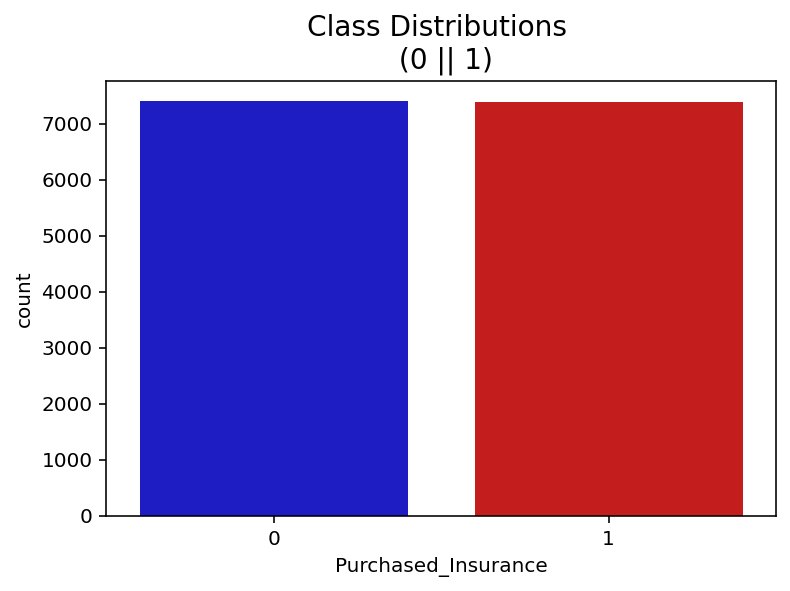

In [225]:
# plt.show()
colors = ["#0101DF", "#DF0101"]

sns.countplot('Purchased_Insurance', data=df, palette=colors)
plt.title('Class Distributions \n (0 || 1)', fontsize=14)

## StandardScaler

In [226]:
from sklearn.preprocessing import StandardScaler, RobustScaler

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

X = df.drop(['Purchased_Insurance'],axis = 1)
columns = list(X.columns)
X = pd.DataFrame(X,columns = columns)

y = df['Purchased_Insurance']

scaled_df = rob_scaler.fit_transform(X)
df = pd.concat([X,y],axis = 1)

In [227]:
df.describe()

,Customer Subtype,Number of houses 1 - 10,Avg size household 1 - 6,Avg age,Customer main type,Roman catholic,Protestant,Other religion,No religion,Married,...,Number of private accident insurance policies,Number of family accidents insurance policies,Number of disability insurance policies,Number of fire policies,Number of surfboard policies,Number of boat policies,Number of bicycle policies,Number of property insurance policies,Number of social security insurance policies,Purchased_Insurance
count,14777.000000,14777.000000,14777.000000,14777.000000,14777.000000,14777.000000,14777.000000,14777.000000,14777.000000,14777.000000,...,14777.000000,14777.000000,14777.000000,14777.000000,14777.000000,14777.000000,14777.000000,14777.000000,14777.000000,14777.000000
mean,22.635988,1.080666,2.670704,2.886445,5.391216,0.635515,4.565270,0.952967,3.033701,6.293294,...,0.002436,0.004466,0.002301,0.573459,0.000541,0.005481,0.022603,0.004263,0.009271,0.499425
std,13.462558,0.334758,0.732199,0.741923,2.989688,0.902490,1.590938,0.945536,1.535874,1.729448,...,0.049300,0.066684,0.053265,0.530889,0.023262,0.077416,0.174600,0.066188,0.096546,0.500017
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,1.000000,2.000000,2.000000,2.000000,0.000000,4.000000,0.000000,2.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,1.000000,3.000000,3.000000,6.000000,0.000000,5.000000,1.000000,3.000000,7.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,34.000000,1.000000,3.000000,3.000000,8.000000,1.000000,5.000000,2.000000,4.000000,7.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,41.000000,10.000000,6.000000,6.000000,10.000000,9.000000,9.000000,5.000000,9.000000,9.000000,...,1.000000,1.000000,2.000000,7.000000,1.000000,2.000000,4.000000,2.000000,2.000000,1.000000


In [228]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

X = df.drop('Purchased_Insurance', axis=1)
y = df['Purchased_Insurance']

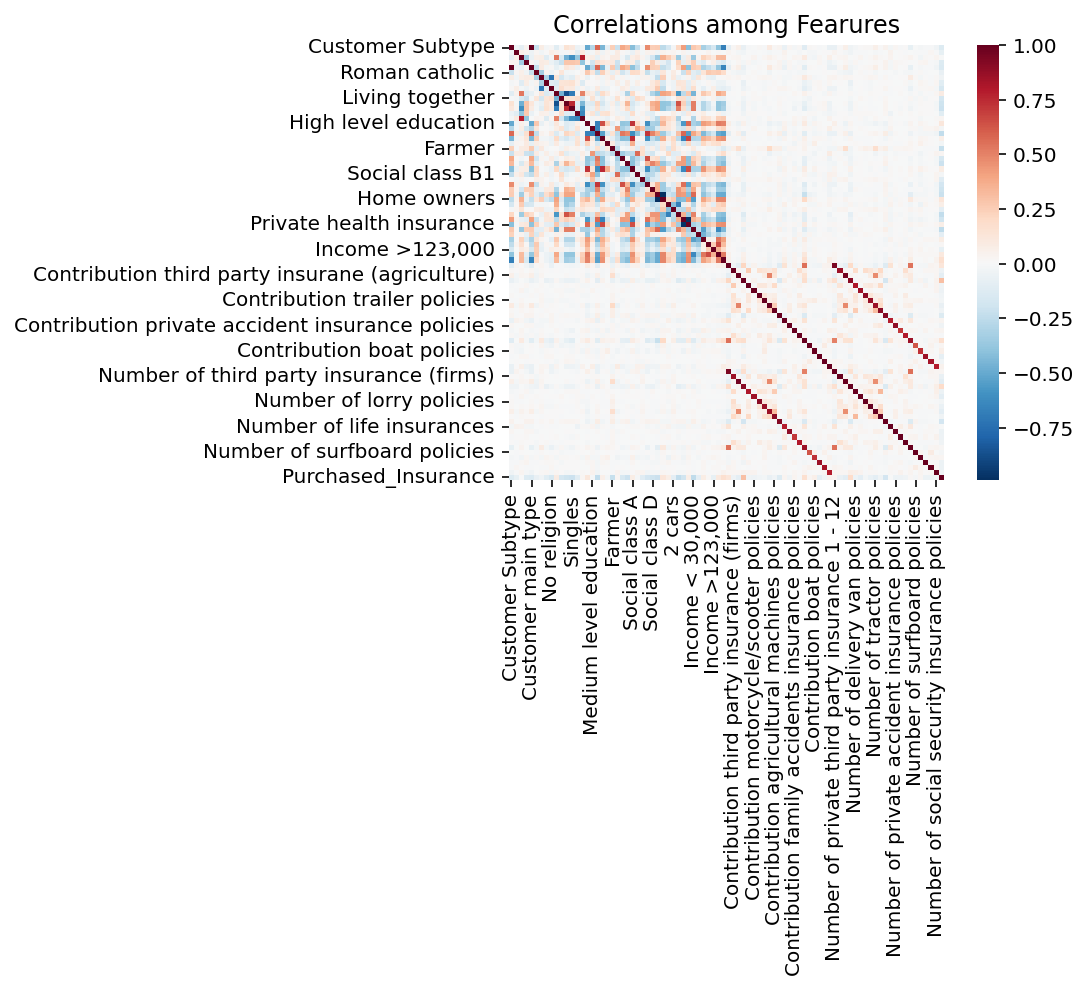

Purchased_Insurance           1.000000
Contribution car policies     0.304337
Number of car policies        0.190026
Purchasing power class        0.165209
Contribution fire policies    0.163856
                                ...   
Rented house                 -0.215491
Farmer                       -0.224702
No car                       -0.236346
Lower level education        -0.239629
Income < 30,000              -0.244755
Name: Purchased_Insurance, Length: 86, dtype: float64

In [229]:
plt.subplots()
sns.heatmap(df.corr(),
           cmap='RdBu_r',
           square=True)
plt.title("Correlations among Fearures");
plt.show()

corr_matrix = df.corr()
corr_matrix["Purchased_Insurance"].sort_values(ascending=False)

In [230]:
from IPython.display import HTML
corr_matrix
# print(len(corr_matrix.loc[corr_matrix['Purchased_Insurance'] > 0.1]))
corr_matrix.loc[corr_matrix['Purchased_Insurance'] > -0.01]

,Customer Subtype,Number of houses 1 - 10,Avg size household 1 - 6,Avg age,Customer main type,Roman catholic,Protestant,Other religion,No religion,Married,...,Number of private accident insurance policies,Number of family accidents insurance policies,Number of disability insurance policies,Number of fire policies,Number of surfboard policies,Number of boat policies,Number of bicycle policies,Number of property insurance policies,Number of social security insurance policies,Purchased_Insurance
Avg size household 1 - 6,-0.086915,0.064201,1.000000,-0.341299,-0.061194,0.062722,0.068416,-0.112990,-0.018356,0.526067,...,0.003477,0.010719,0.015958,0.040819,0.006494,-0.032627,0.020108,0.009420,0.034574,-0.001811
Married,-0.104359,0.048558,0.526067,-0.117982,-0.073018,0.014078,0.137303,-0.136499,-0.099828,1.000000,...,-0.000443,0.014461,0.004429,-0.010863,0.011193,-0.019591,0.007629,-0.003830,0.024651,0.085109
Household with children,-0.025338,0.094957,0.784263,-0.386261,-0.001070,0.036762,0.027144,-0.127545,0.030169,0.495143,...,-0.001024,0.004985,0.004910,0.007437,0.008094,-0.024078,-0.001459,0.004498,0.020006,0.025992
High level education,-0.506248,-0.032200,0.061215,-0.010894,-0.502333,0.274338,-0.070839,0.020887,-0.049584,0.115510,...,-0.007235,0.011067,-0.011061,0.038991,-0.000115,0.039646,0.017992,0.004964,0.012699,0.114763
High status,-0.452440,-0.040783,0.045490,0.125560,-0.443179,0.245671,-0.028623,-0.030140,-0.058361,0.198462,...,0.005183,0.012537,0.000621,0.018085,0.005074,0.036149,0.028804,0.009810,0.004045,0.062426
Middle management,-0.218842,0.086050,0.090147,-0.206204,-0.233560,0.089504,-0.024897,0.072537,-0.010288,0.043241,...,-0.011814,-0.005606,-0.002756,0.006164,-0.008380,-0.035133,-0.004298,0.007565,0.044332,0.026658
Social class A,-0.415576,-0.061577,0.069281,0.079278,-0.403314,0.192623,-0.007730,-0.021676,-0.060722,0.203388,...,0.001592,0.014633,0.000398,0.036868,0.008212,0.056298,0.024672,0.011430,0.009661,0.078287
Home owners,-0.256729,0.051634,0.357069,-0.065147,-0.233575,0.129105,0.247066,-0.160307,-0.244955,0.404113,...,-0.011409,0.014241,0.010127,0.100507,0.022209,0.015528,0.016496,-0.005149,0.024871,0.126161
1 car,-0.170645,0.025505,0.259691,-0.173425,-0.164908,-0.016060,-0.019609,-0.016398,0.012779,0.363593,...,-0.008532,0.028443,-0.004079,-0.030563,-0.001708,-0.048925,0.028996,0.009154,0.019498,0.072042
Private health insurance,-0.411823,-0.013328,0.093010,0.118549,-0.399437,0.236371,0.048310,-0.095186,-0.103456,0.272825,...,0.009439,0.010404,-0.008773,0.040374,0.015047,0.033374,0.019599,0.008692,0.021369,0.070661


In [237]:
features = columns
# colors = ['#B3F9C5', '#f9c5b3']

# # Removing Outliers (Highest Negative Correlated with Labels)
for v in features:
    print(v)
    val = df[v].values
    q25, q75 = np.percentile(val, 25), np.percentile(val, 75)
    print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
    iqr = q75 - q25
    print('iqr: {}'.format(iqr))

    cut_off = iqr * 1.5
    if (cut_off == 0):
        continue
    lower, upper = q25 - cut_off, q75 + cut_off
    print('Cut Off: {}'.format(cut_off))
    print(v, 'Lower: {}'.format(lower))
    print(v, 'Upper: {}'.format(upper))

    outliers = [x for x in val if x < lower or x > upper]
    print('Feature', v, 'Outliers: {}'.format(len(outliers)))
    print(v,'outliers:{}'.format(outliers))

    new_df = df.drop(df[(df[v] > upper) | (df[v] <lower)].index)
    print('----' * 30)

Customer Subtype
Quartile 25: 9.0 | Quartile 75: 34.0
iqr: 25.0
Cut Off: 37.5
Customer Subtype Lower: -28.5
Customer Subtype Upper: 71.5
Feature Customer Subtype Outliers: 0
Customer Subtype outliers:[]
------------------------------------------------------------------------------------------------------------------------
Number of houses 1 - 10
Quartile 25: 1.0 | Quartile 75: 1.0
iqr: 0.0
Avg size household 1 - 6
Quartile 25: 2.0 | Quartile 75: 3.0
iqr: 1.0
Cut Off: 1.5
Avg size household 1 - 6 Lower: 0.5
Avg size household 1 - 6 Upper: 4.5
Feature Avg size household 1 - 6 Outliers: 87
Avg size household 1 - 6 outliers:[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
--------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------------
Married
Quartile 25: 5.0 | Quartile 75: 7.0
iqr: 2.0
Cut Off: 3.0
Married Lower: 2.0
Married Upper: 10.0
Feature Married Outliers: 250
Married outliers:[0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 

------------------------------------------------------------------------------------------------------------------------
Skilled labourers
Quartile 25: 1.0 | Quartile 75: 3.0
iqr: 2.0
Cut Off: 3.0
Skilled labourers Lower: -2.0
Skilled labourers Upper: 6.0
Feature Skilled labourers Outliers: 199
Skilled labourers outliers:[7, 8, 8, 7, 9, 7, 8, 9, 7, 7, 8, 8, 7, 7, 7, 8, 7, 8, 7, 7, 7, 8, 7, 7, 7, 7, 7, 7, 7, 8, 9, 7, 8, 7, 9, 8, 7, 8, 7, 7, 7, 7, 7, 7, 8, 7, 7, 7, 7, 8, 7, 7, 8, 7, 7, 7, 8, 7, 8, 7, 7, 8, 7, 8, 7, 7, 8, 8, 7, 7, 7, 7, 9, 7, 7, 8, 8, 8, 7, 9, 7, 7, 9, 7, 7, 7, 8, 7, 9, 7, 7, 7, 8, 7, 7, 7, 7, 8, 7, 8, 9, 8, 8, 7, 7, 8, 7, 7, 7, 9, 8, 9, 7, 7, 7, 7, 7, 7, 7, 8, 7, 9, 7, 7, 7, 9, 7, 7, 8, 7, 8, 7, 7, 7, 8, 7, 7, 8, 7, 7, 7, 8, 7, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 7, 7, 7, 7, 7, 7, 7, 9, 8, 9, 7, 8, 7, 9, 7, 9, 7, 7, 7, 7, 8, 7, 7, 7, 7, 7, 7, 7, 8, 7, 7, 9, 7, 7, 8, 7, 9, 7, 7, 7, 7, 7, 7]
-------------------------------------------------------------------------------

Feature Rented house Outliers: 0
Rented house outliers:[]
------------------------------------------------------------------------------------------------------------------------
Home owners
Quartile 25: 3.0 | Quartile 75: 8.0
iqr: 5.0
Cut Off: 7.5
Home owners Lower: -4.5
Home owners Upper: 15.5
Feature Home owners Outliers: 0
Home owners outliers:[]
------------------------------------------------------------------------------------------------------------------------
1 car
Quartile 25: 5.0 | Quartile 75: 7.0
iqr: 2.0
Cut Off: 3.0
1 car Lower: 2.0
1 car Upper: 10.0
Feature 1 car Outliers: 37
1 car outliers:[1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0]
------------------------------------------------------------------------------------------------------------------------
2 cars
Quartile 25: 0.0 | Quartile 75: 2.0
iqr: 2.0
Cut Off: 3.0
2 cars Lower: -3.0
2 cars Upper: 5.0
Feature 2 cars Outliers: 13
2 cars outliers:[6, 6,

Feature Purchasing power class Outliers: 0
Purchasing power class outliers:[]
------------------------------------------------------------------------------------------------------------------------
Contribution private third party insurance
Quartile 25: 0.0 | Quartile 75: 2.0
iqr: 2.0
Cut Off: 3.0
Contribution private third party insurance Lower: -3.0
Contribution private third party insurance Upper: 5.0
Feature Contribution private third party insurance Outliers: 0
Contribution private third party insurance outliers:[]
------------------------------------------------------------------------------------------------------------------------
Contribution third party insurance (firms)
Quartile 25: 0.0 | Quartile 75: 0.0
iqr: 0.0
Contribution third party insurane (agriculture)
Quartile 25: 0.0 | Quartile 75: 0.0
iqr: 0.0
Contribution car policies
Quartile 25: 0.0 | Quartile 75: 6.0
iqr: 6.0
Cut Off: 9.0
Contribution car policies Lower: -9.0
Contribution car policies Upper: 15.0
Feature Con

In [238]:
print('initial lenth:', len(df))
print('remove outliers:', len(new_df))

initial lenth: 14777
remove outliers: 14762


In [239]:
X = new_df.drop('Avg size household 1 - 6', axis=1).drop('Purchased_Insurance', axis = 1)

y = new_df['Purchased_Insurance']

Text(0.5, 1.0, 'Class Distributions after removeing outliers \n (0 || 1)')

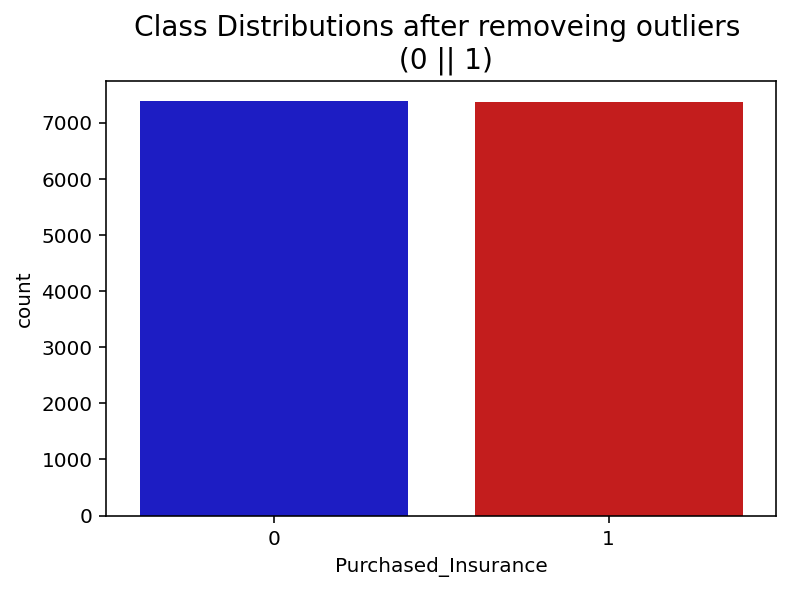

In [240]:
sns.countplot('Purchased_Insurance', data=new_df, palette=colors)
plt.title('Class Distributions after removeing outliers \n (0 || 1)', fontsize=14)

# Dimensional reduction

PCA

In [ ]:
pca = PCA(n_components = 2,whiten = True)
pca_train = pca.fit_transform(x_train)
print("variance ratio:", pca.explained_variance_ratio_)
pca_test = pca.transform(x_test)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# Classifiers

In [34]:
from sklearn.metrics import make_scorer
from sklearn.metrics import recall_score, roc_auc_score,f1_score
from sklearn.model_selection import train_test_split, learning_curve, ShuffleSplit, RandomizedSearchCV, GridSearchCV
scoring = {
           "ROC_AUC": make_scorer(roc_auc_score, average='micro'),
           "F1_score": make_scorer(f1_score, average='micro'),
           }

NN

In [28]:
parameter_nn = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

cv_nn = RandomizedSearchCV(MLPClassifier(random_state=1, max_iter=300), 
                           parameter_nn,
                          scoring = scoring,
                            refit = 'ROC_AUC',
                            random_state = 42,
                            verbose=3,)
                            
cv_nn.fit(original_Xtrain, original_ytrain)
result_nn = pd.DataFrame(cv_nn.cv_results_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=adam; F1_score: (test=0.942) ROC_AUC: (test=0.942) total time=   9.3s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=adam; F1_score: (test=0.940) ROC_AUC: (test=0.940) total time=   7.7s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=adam; F1_score: (test=0.937) ROC_AUC: (test=0.937) total time=   8.1s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=adam; F1_score: (test=0.948) ROC_AUC: (test=0.948) total time=   7.8s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=adam; F1_score: (test=0.932) ROC_AUC: (test=0.932) total time=   7.1s
[CV 1/5] END activation=relu, alpha=0.05, hidden_

[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=adam; F1_score: (test=0.940) ROC_AUC: (test=0.940) total time=   6.3s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=adam; F1_score: (test=0.937) ROC_AUC: (test=0.937) total time=   6.6s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=adam; F1_score: (test=0.948) ROC_AUC: (test=0.948) total time=   6.3s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=adam; F1_score: (test=0.932) ROC_AUC: (test=0.932) total time=   5.3s


In [32]:
HTML(result_nn.loc[result_nn['rank_test_F1_score'] == 1].to_html())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_solver,param_learning_rate,param_hidden_layer_sizes,param_alpha,param_activation,params,split0_test_ROC_AUC,split1_test_ROC_AUC,split2_test_ROC_AUC,split3_test_ROC_AUC,split4_test_ROC_AUC,mean_test_ROC_AUC,std_test_ROC_AUC,rank_test_ROC_AUC,split0_test_F1_score,split1_test_F1_score,split2_test_F1_score,split3_test_F1_score,split4_test_F1_score,mean_test_F1_score,std_test_F1_score,rank_test_F1_score
0,8.094357,0.732684,0.007979,0.000892,adam,adaptive,"(50, 50, 50)",0.0001,relu,"{'solver': 'adam', 'learning_rate': 'adaptive', 'hidden_layer_sizes': (50, 50, 50), 'alpha': 0.0001, 'activation': 'relu'}",0.942058,0.939912,0.936558,0.94755,0.931891,0.939594,0.005254,1,0.942072,0.939932,0.936548,0.947547,0.931895,0.939599,0.005254,1
9,6.544059,0.744577,0.005984,0.000631,adam,constant,"(50, 50, 50)",0.0001,relu,"{'solver': 'adam', 'learning_rate': 'constant', 'hidden_layer_sizes': (50, 50, 50), 'alpha': 0.0001, 'activation': 'relu'}",0.942058,0.939912,0.936558,0.94755,0.931891,0.939594,0.005254,1,0.942072,0.939932,0.936548,0.947547,0.931895,0.939599,0.005254,1


In [38]:
nn = cv_nn.best_estimator_
y_pred = nn.predict(original_Xtest)
f1 = f1_score(original_ytest, y_pred)
roc_auc = roc_auc_score(original_ytest, y_pred)
print('f1:' ,f1)
print('roc_auc:', roc_auc)

f1: 0.9402777777777779
roc_auc: 0.9417801948289753


## Logistic Regression

In [36]:
parameter_lr ={
    'penalty': ['l2'],
    'C': [100, 10, 1, .1, .01],
    'solver': ['newton-cg','lbfgs','liblinear','sag'],
    }
cv_lr = GridSearchCV(LogisticRegression(max_iter = 1000), 
                     parameter_lr,
                    scoring = scoring,
                            refit = 'ROC_AUC',
                            )

cv_lr.fit(original_Xtrain, original_ytrain)
result_lr = pd.DataFrame(cv_lr.cv_results_)

In [37]:
lr = cv_lr.best_estimator_
HTML(result_lr.loc[result_lr['rank_test_F1_score'] == 1].to_html())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_ROC_AUC,split1_test_ROC_AUC,split2_test_ROC_AUC,split3_test_ROC_AUC,split4_test_ROC_AUC,mean_test_ROC_AUC,std_test_ROC_AUC,rank_test_ROC_AUC,split0_test_F1_score,split1_test_F1_score,split2_test_F1_score,split3_test_F1_score,split4_test_F1_score,mean_test_F1_score,std_test_F1_score,rank_test_F1_score
2,0.99914,0.168493,0.004171,0.000396,100,l2,liblinear,"{'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}",0.922147,0.901801,0.90648,0.91368,0.902245,0.909271,0.007723,1,0.922199,0.901861,0.906514,0.913706,0.902284,0.909313,0.007721,1


In [39]:
y_pred = lr.predict(original_Xtest)
f1 = f1_score(original_ytest, y_pred)
roc_auc = roc_auc_score(original_ytest, y_pred)
print('f1:' ,f1)
print('roc_auc:', roc_auc)

f1: 0.9090272918124563
roc_auc: 0.9120001098659636


In [93]:
parameter_xgboost ={
    'learning_rate' : [0.05,0.10,0.15,0.20,0.25,0.30],
    'max_depth' : [ 3, 4, 5, 6, 8, 10, 12, 15], 
    'min_child_weight' : [ 1, 3, 5, 7 ],
    'gamma': [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
    'colsample_bytree' : [ 0.3, 0.4, 0.5 , 0.7 ]
    }

cv_xgboost = RandomizedSearchCV(XGBClassifier(use_label_encoder=False), 
                                parameter_xgboost,
                               scoring = scoring,
                                refit = 'F1_score')

cv_xgboost.fit(original_Xtrain.values, original_ytrain.values.ravel())
result_xgboost = pd.DataFrame(cv_xgboost.cv_results_)

[15:32:53] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:32:53] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:32:54] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:32:54] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

[15:33:04] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:33:04] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:33:04] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:33:05] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

In [94]:
xgboost = cv_xgboost.best_estimator_
HTML(result_xgboost.loc[result_xgboost['rank_test_F1_score'] == 1].to_html())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_child_weight,param_max_depth,param_learning_rate,param_gamma,param_colsample_bytree,params,split0_test_ROC_AUC,split1_test_ROC_AUC,split2_test_ROC_AUC,split3_test_ROC_AUC,split4_test_ROC_AUC,mean_test_ROC_AUC,std_test_ROC_AUC,rank_test_ROC_AUC,split0_test_F1_score,split1_test_F1_score,split2_test_F1_score,split3_test_F1_score,split4_test_F1_score,mean_test_F1_score,std_test_F1_score,rank_test_F1_score
1,0.482111,0.030536,0.00718,0.000399,3,12,0.15,0.4,0.3,"{'min_child_weight': 3, 'max_depth': 12, 'learning_rate': 0.15, 'gamma': 0.4, 'colsample_bytree': 0.3}",0.958562,0.956846,0.956002,0.960233,0.952192,0.956767,0.002711,1,0.958562,0.956853,0.956007,0.960237,0.9522,0.956772,0.00271,1


In [95]:
y_pred = xgboost.predict(original_Xtest)
f1 = f1_score(original_ytest, y_pred)
roc_auc = roc_auc_score(original_ytest, y_pred)
print('f1:' ,f1)
print('roc_auc:', roc_auc)

f1: 0.9601362862010221
roc_auc: 0.9604116311433384


outlier remove

In [108]:
cv_xgboost.fit(X.values,y.values.ravel())
result_xgboost = pd.DataFrame(cv_xgboost.cv_results_)

[15:41:43] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:44] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:45] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:46] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

[15:41:56] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:57] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:57] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:58] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

In [98]:
xgboost = cv_xgboost.best_estimator_
HTML(result_xgboost.loc[result_xgboost['rank_test_F1_score'] == 1].to_html())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_child_weight,param_max_depth,param_learning_rate,param_gamma,param_colsample_bytree,params,split0_test_ROC_AUC,split1_test_ROC_AUC,split2_test_ROC_AUC,split3_test_ROC_AUC,split4_test_ROC_AUC,mean_test_ROC_AUC,std_test_ROC_AUC,rank_test_ROC_AUC,split0_test_F1_score,split1_test_F1_score,split2_test_F1_score,split3_test_F1_score,split4_test_F1_score,mean_test_F1_score,std_test_F1_score,rank_test_F1_score
6,0.405915,0.007777,0.00758,0.000798,3,10,0.25,0.1,0.3,"{'min_child_weight': 3, 'max_depth': 10, 'learning_rate': 0.25, 'gamma': 0.1, 'colsample_bytree': 0.3}",0.956592,0.953191,0.957033,0.959558,0.95277,0.955829,0.00254,1,0.956596,0.953191,0.957021,0.959557,0.952746,0.955822,0.002544,1


In [100]:
y_pred = xgboost.predict(original_Xtest)
f1 = f1_score(original_ytest, y_pred)
roc_auc = roc_auc_score(original_ytest, y_pred)
print('f1:' ,f1)
print('roc_auc:', roc_auc)

f1: 0.9604635310156783
roc_auc: 0.9607494689811762


delete 'Avg size household 1 - 6' + outlier remove

In [109]:
xgboost = cv_xgboost.best_estimator_
HTML(result_xgboost.loc[result_xgboost['rank_test_F1_score'] == 1].to_html())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_child_weight,param_max_depth,param_learning_rate,param_gamma,param_colsample_bytree,params,split0_test_ROC_AUC,split1_test_ROC_AUC,split2_test_ROC_AUC,split3_test_ROC_AUC,split4_test_ROC_AUC,mean_test_ROC_AUC,std_test_ROC_AUC,rank_test_ROC_AUC,split0_test_F1_score,split1_test_F1_score,split2_test_F1_score,split3_test_F1_score,split4_test_F1_score,mean_test_F1_score,std_test_F1_score,rank_test_F1_score
5,0.788492,0.041177,0.00738,0.000489,3,15,0.1,0.2,0.7,"{'min_child_weight': 3, 'max_depth': 15, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.7}",0.957862,0.95363,0.957468,0.961695,0.956175,0.957366,0.002622,1,0.957872,0.953617,0.957447,0.961686,0.956152,0.957355,0.002625,1


In [116]:
y_pred = xgboost.predict(Xtest)
f1 = f1_score(ytest, y_pred)
roc_auc = roc_auc_score(ytest, y_pred)
print('f1:' ,f1)
print('roc_auc:', roc_auc)

f1: 0.9608443990466462
roc_auc: 0.9610891379184062


# SVM

In [128]:
parameter_svm ={
    'C': range(1,11),
    'kernel': ['poly', 'rbf', 'sigmoid']
    }
cv_svm = GridSearchCV(SVC(), 
                      parameter_svm,
                     scoring = scoring,
                    refit = 'F1_score')

cv_svm.fit(X.values,y.values.ravel())
result_svm = pd.DataFrame(cv_svm.cv_results_)

In [129]:
svm = cv_svm.best_estimator_
result_svm.loc[result_svm['rank_test_F1_score'] == 1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_ROC_AUC,split1_test_ROC_AUC,split2_test_ROC_AUC,...,std_test_ROC_AUC,rank_test_ROC_AUC,split0_test_F1_score,split1_test_F1_score,split2_test_F1_score,split3_test_F1_score,split4_test_F1_score,mean_test_F1_score,std_test_F1_score,rank_test_F1_score
27,1.755288,0.032757,0.197885,0.001851,10,poly,"{'C': 10, 'kernel': 'poly'}",0.934136,0.925227,0.925261,...,0.004664,1,0.934043,0.925106,0.925106,0.933163,0.92252,0.927988,0.004689,1


In [130]:
y_pred = svm.predict(Xtest)
f1 = f1_score(ytest, y_pred)
roc_auc = roc_auc_score(ytest, y_pred)
print('f1:' ,f1)
print('roc_auc:', roc_auc)

f1: 0.9336114007646854
roc_auc: 0.9353512048634


In [140]:
parameter_dt ={
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': [2, 10, 20, 50, 100]
    }

dt = DecisionTreeClassifier(random_state=42)

dt_estimator = GridSearchCV(dt,
                            parameter_dt,
                            scoring = scoring,
                            refit = 'F1_score'
                            )
dt_estimator.fit(X.values,y.values.ravel())

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [2, 10, 20, 50, 100]},
             refit='F1_score',
             scoring={'F1_score': make_scorer(f1_score, average=micro),
                      'ROC_AUC': make_scorer(roc_auc_score, average=micro)})

In [145]:
result_dt = pd.DataFrame(dt_estimator.cv_results_)
result_dt.loc[result_dt['rank_test_F1_score'] == 1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_min_samples_leaf,params,split0_test_ROC_AUC,split1_test_ROC_AUC,split2_test_ROC_AUC,...,std_test_ROC_AUC,rank_test_ROC_AUC,split0_test_F1_score,split1_test_F1_score,split2_test_F1_score,split3_test_F1_score,split4_test_F1_score,mean_test_F1_score,std_test_F1_score,rank_test_F1_score
5,0.08958,0.002695,0.002972,0.000016,entropy,2,"{'criterion': 'entropy', 'min_samples_leaf': 2}",0.912316,0.90637,0.905088,...,0.002671,1,0.91234,0.906383,0.905106,0.905917,0.905492,0.907048,0.00268,1


# Dimensional Reduction

PCA

In [60]:

pca = PCA(n_components = 20,whiten = True)
pca_train = pca.fit_transform(X)

print("variance ratio:", sum(pca.explained_variance_ratio_))
pca_test = pca.transform(Xtest)

variance ratio: 0.9564254901868994


pca+xgboost

In [61]:
cv_xgboost.fit(pca_train, original_ytrain.values.ravel())
result_xgboost = pd.DataFrame(cv_xgboost.cv_results_)

[15:10:09] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:10:10] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:10:10] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:10:11] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

[15:10:23] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:10:23] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:10:24] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:10:24] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

In [62]:
xgboost = cv_xgboost.best_estimator_
HTML(result_xgboost.loc[result_xgboost['rank_test_F1_score'] == 1].to_html())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_child_weight,param_max_depth,param_learning_rate,param_gamma,param_colsample_bytree,params,split0_test_ROC_AUC,split1_test_ROC_AUC,split2_test_ROC_AUC,split3_test_ROC_AUC,split4_test_ROC_AUC,mean_test_ROC_AUC,std_test_ROC_AUC,rank_test_ROC_AUC,split0_test_F1_score,split1_test_F1_score,split2_test_F1_score,split3_test_F1_score,split4_test_F1_score,mean_test_F1_score,std_test_F1_score,rank_test_F1_score
2,0.832375,0.053118,0.006981,2.780415e-07,5,15,0.15,0.2,0.7,"{'min_child_weight': 5, 'max_depth': 15, 'learning_rate': 0.15, 'gamma': 0.2, 'colsample_bytree': 0.7}",0.923071,0.914166,0.926831,0.920904,0.926408,0.922276,0.004607,1,0.923044,0.914129,0.926819,0.920897,0.926396,0.922257,0.004615,1


In [63]:
y_pred = xgboost.predict(pca_test)

f1 = f1_score(ytest, y_pred)
roc_auc = roc_auc_score(ytest, y_pred)
print('f1:' ,f1)
print('roc_auc:', roc_auc)

f1: 0.9375419744795165
roc_auc: 0.9370889181864792


In [22]:
eva = []
column = ['Classifier','F1_score','ROC_AUC','f1+roc/2']

for name, algorithm in classifiers:
    print(name)
    algorithm.fit(original_Xtrain, original_ytrain)
    best_est = algorithm[name]
    y_pred = best_est.predict(original_Xtest)
    
    # dataframe 
    f1 = f1_score(original_ytest, y_pred)
    roc_auc = roc_auc_score(original_ytest, y_pred)
    val = (f1+roc_auc)/2
    eva.append([name, f1, roc_auc, val])
    
    
evaluation = pd.DataFrame(eva, columns=columns)

Logistic Regression


TypeError: 'RandomizedSearchCV' object is not subscriptable

In [ ]:
evaluation2

In [ ]:
scoring = {
           "F2_score": make_scorer(metrics.fbeta_score, beta=2, average='micro'),
           "AUC_ROC"
           }

# STACKING

In [241]:
estimators = [
    ('xgb', XGBClassifier(min_child_weight = 5, 
                    max_depth = 15, 
                    learning_rate = 0.15, 
                    gamma = 0.2, 
                    colsample_bytree = 0.7)),
    ('nn', MLPClassifier(solver = 'adam',
                         learning_rate = 'adaptive',
                         hidden_layer_sizes = (50, 50, 50), 
                         alpha = 0.0001, 
                         activation = 'relu')
    ),
    ('svm', SVC(C = 10, 
                kernel = 'poly')),
    ('rf', RandomForestClassifier(
        n_estimators = 500,
        random_state=42))
]

In [242]:
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

In [243]:
clf.fit(X.values,y.values.ravel())

[17:02:06] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:02:33] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:02:34] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:02:35] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

StackingClassifier(estimators=[('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=0.7,
                                              enable_categorical=False,
                                              gamma=0.2, gpu_id=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=0.15,
                                              max_delta_step=None, max_depth=15,
                                              min_child_weight=5, missing=nan,
                                              monotone_constraints=No...
                                              predictor=None, random_state=None,
           

In [244]:
y_pred = clf.predict(xtest)

In [252]:
columns = ['Predictions']
pd.DataFrame(y_pred, columns = columns).to_csv("abc.csv", index = False)

In [246]:
y_pred?